# HEART DISEASE  PREDICTION

# Business problem
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.


 One of the leading causes of death over world is Heart disease.This report analyzed the data to identify the patterns,correlation and predicts.
The dataset used for this analysis comprises anonymized patient records, including demographic, clinical, and laboratory data. 
It includes the following key variables:-

## Domain Analysis

Age: Age of the patient in years.

Sex: Gender (1 = Male, 0 = Female).

Chest Pain Type (CP): Types of chest pain experienced by the patient (0-3).

Resting Blood Pressure (RB): Measured in mm Hg.

Cholesterol: Serum cholesterol level in mg/dL.

Fasting Blood Sugar (FBS): If fasting blood sugar > 120 mg/dL (1 = True, 0 = False).

Resting ECG Results (ECG): Results of resting electrocardiographic tests (0-2).

Max Heart Rate (Thalach): Maximum heart rate achieved.

Exercise-Induced Angina (Exang): 1 = Yes, 0 = No.

Slope: The slope of the peak exercise ST segment (0-3).

Major Vessels (CA): Number of major vessels colored by fluoroscopy (0-3).

Thalassemia (Thal - categorical column converted into numerical by using Z-score ): A blood disorder type (1-3).

Target: Presence of heart disease (1 = Yes, 0 = No).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy import stats
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Merging dataset 

In [3]:
# Loading (values)
features = pd.read_csv(r"C:\Users\shaks\Downloads\PRCP-1016-HeartDieseasePred\Data\values.csv")  

# Loading labels (target column)
labels = pd.read_csv(r"C:\Users\shaks\Downloads\PRCP-1016-HeartDieseasePred\Data\labels.csv")  

In [4]:
# ensuring both are merging 
print(features.head())
print(labels.head())

  patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0

In [5]:
# merging the data
merged_data = pd.merge(features, labels, on="patient_id")

In [6]:
# verifying merged data
print(merged_data.head())

  patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0

In [7]:
x = merged_data.drop (columns = ["heart_disease_present"])
y = merged_data['heart_disease_present']

In [8]:
# saving the dataset
merged_data.to_csv("merged_data.csv", index= False)

In [56]:
df =pd.read_csv(r"C:\Users\shaks\OneDrive\Documents\Desktop\CDS Projects\Heart disease prediction -1016\merged_data.csv")
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# TASK: 1 Basic checks

In [59]:
df.drop(['patient_id'], axis =1, inplace =True)

In [61]:
# To display first 5 rows
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [63]:
# Getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [65]:
# To display last 5 rows
df.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [67]:
# statstical measure of the data 
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [69]:
df.shape

(180, 14)

# EDA (Exploratory data analysis)

# Univariate analysis

<Axes: xlabel='age', ylabel='Count'>

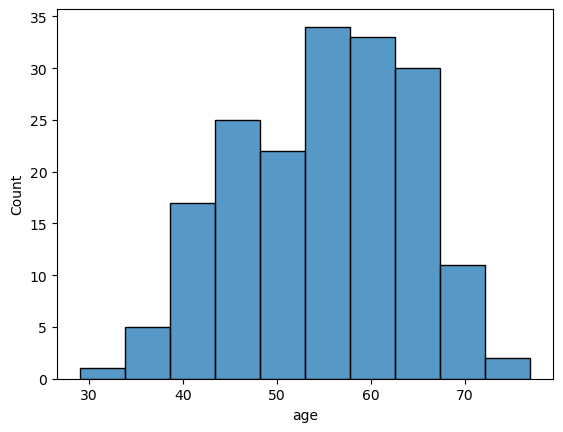

In [73]:
sns.histplot(df['age'])

 Age:(Average age of patients: 54.4 years)

Majority of patients fall in the age group of 40-60 years.

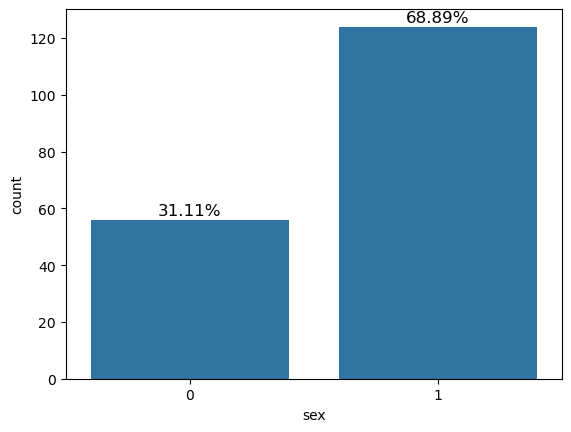

In [75]:
sns.countplot(x='sex',data=df)
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{percentage:.2f}%', 
             ha='center', va='bottom', fontsize=12)



### sex:
Male: 68.89%

Female: 31.11%

<Axes: xlabel='chest_pain_type', ylabel='count'>

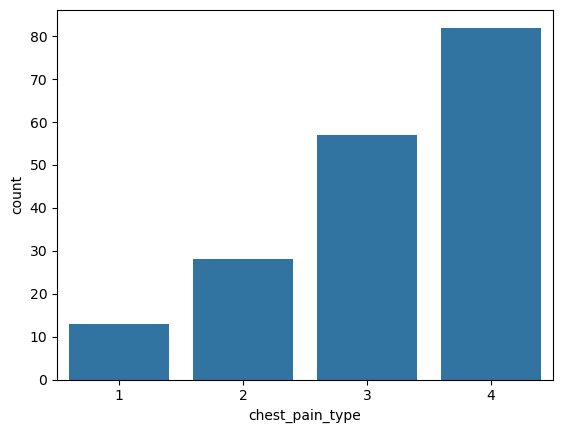

In [77]:
sns.countplot(x='chest_pain_type',data=df)

# Bivariate analysis

Text(0.5, 0, 'heart_disease_present')

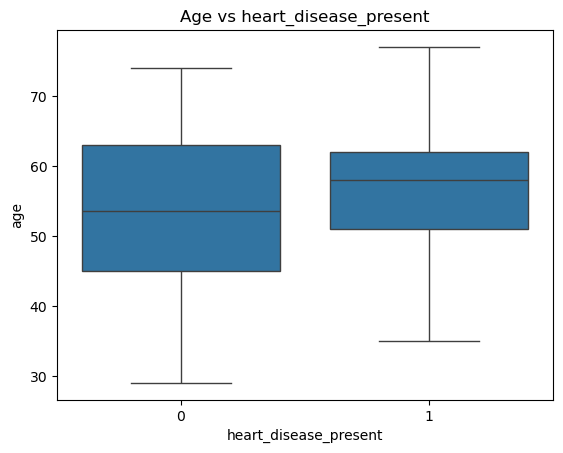

In [79]:
#Numerical vs Categorical
# age vs heart_disease_present
sns.boxplot(x='heart_disease_present',y='age',data=df)
plt.title('Age vs heart_disease_present')
plt.xlabel('heart_disease_present')

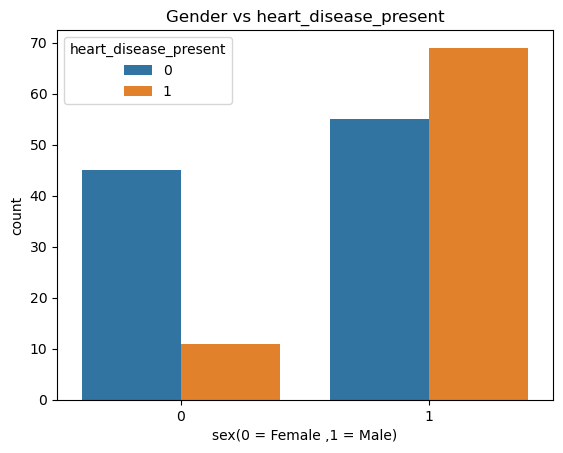

In [80]:
# Categorical vs categorical
# sev vs heart_disease_present
sns.countplot(x='sex',hue='heart_disease_present',data=df)
plt.title('Gender vs heart_disease_present')
plt.xlabel('sex(0 = Female ,1 = Male)')
plt.ylabel('count')
plt.legend (title='heart_disease_present')

C:\Users\shaks\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\shaks\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


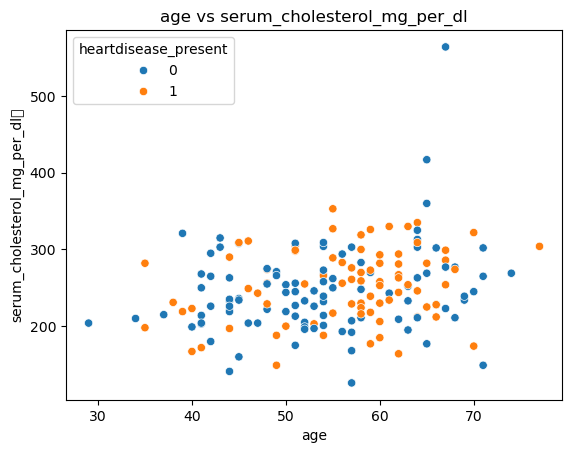

In [81]:
# numerical vs numerical
# Age vs serum_cholesterol_mg_per_dl	
sns.scatterplot(x='age',y='serum_cholesterol_mg_per_dl',hue='heart_disease_present',data=df)
plt.title('age vs serum_cholesterol_mg_per_dl')
plt.xlabel('age')
plt.ylabel('serum_cholesterol_mg_per_dl	') 
plt.legend (title='heartdisease_present')

# Target Variable Distribution

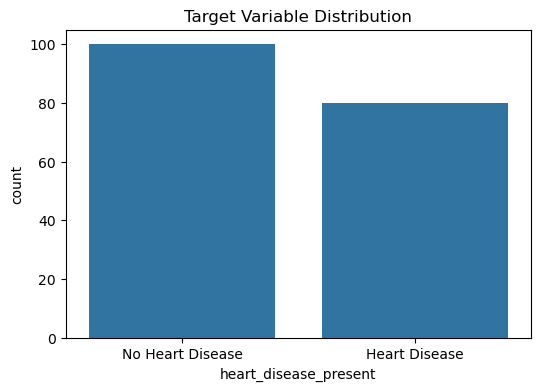

In [83]:
plt.figure(figsize=(6, 4))
sns.countplot(x ='heart_disease_present', data=df)
plt.title('Target Variable Distribution')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

Heart Disease Prevalence:

Patients with heart disease: 54%.

Patients without heart disease: 90%.

# Data preprocessing

In [91]:
# Handling  the missing values
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

 No missing values present in the dataset

In [94]:
# encoding categorical values
print(df["thal"].unique())

['normal' 'reversible_defect' 'fixed_defect']


In [95]:
label_encoder = LabelEncoder()
df["thal_encoded"] = label_encoder.fit_transform(df["thal"])

In [96]:
# View the mapping of categories to numbers
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Check the DataFrame
print(df[["thal", "thal_encoded"]].head())

{'fixed_defect': 0, 'normal': 1, 'reversible_defect': 2}
                thal  thal_encoded
0             normal             1
1             normal             1
2             normal             1
3  reversible_defect             2
4  reversible_defect             2


Data was scaled and normalized where necessary,Categorical variables were encoded using one-hot encoding.

In [98]:
# dropping column
df.drop(columns=["thal"], inplace=True)

 # checking outliers


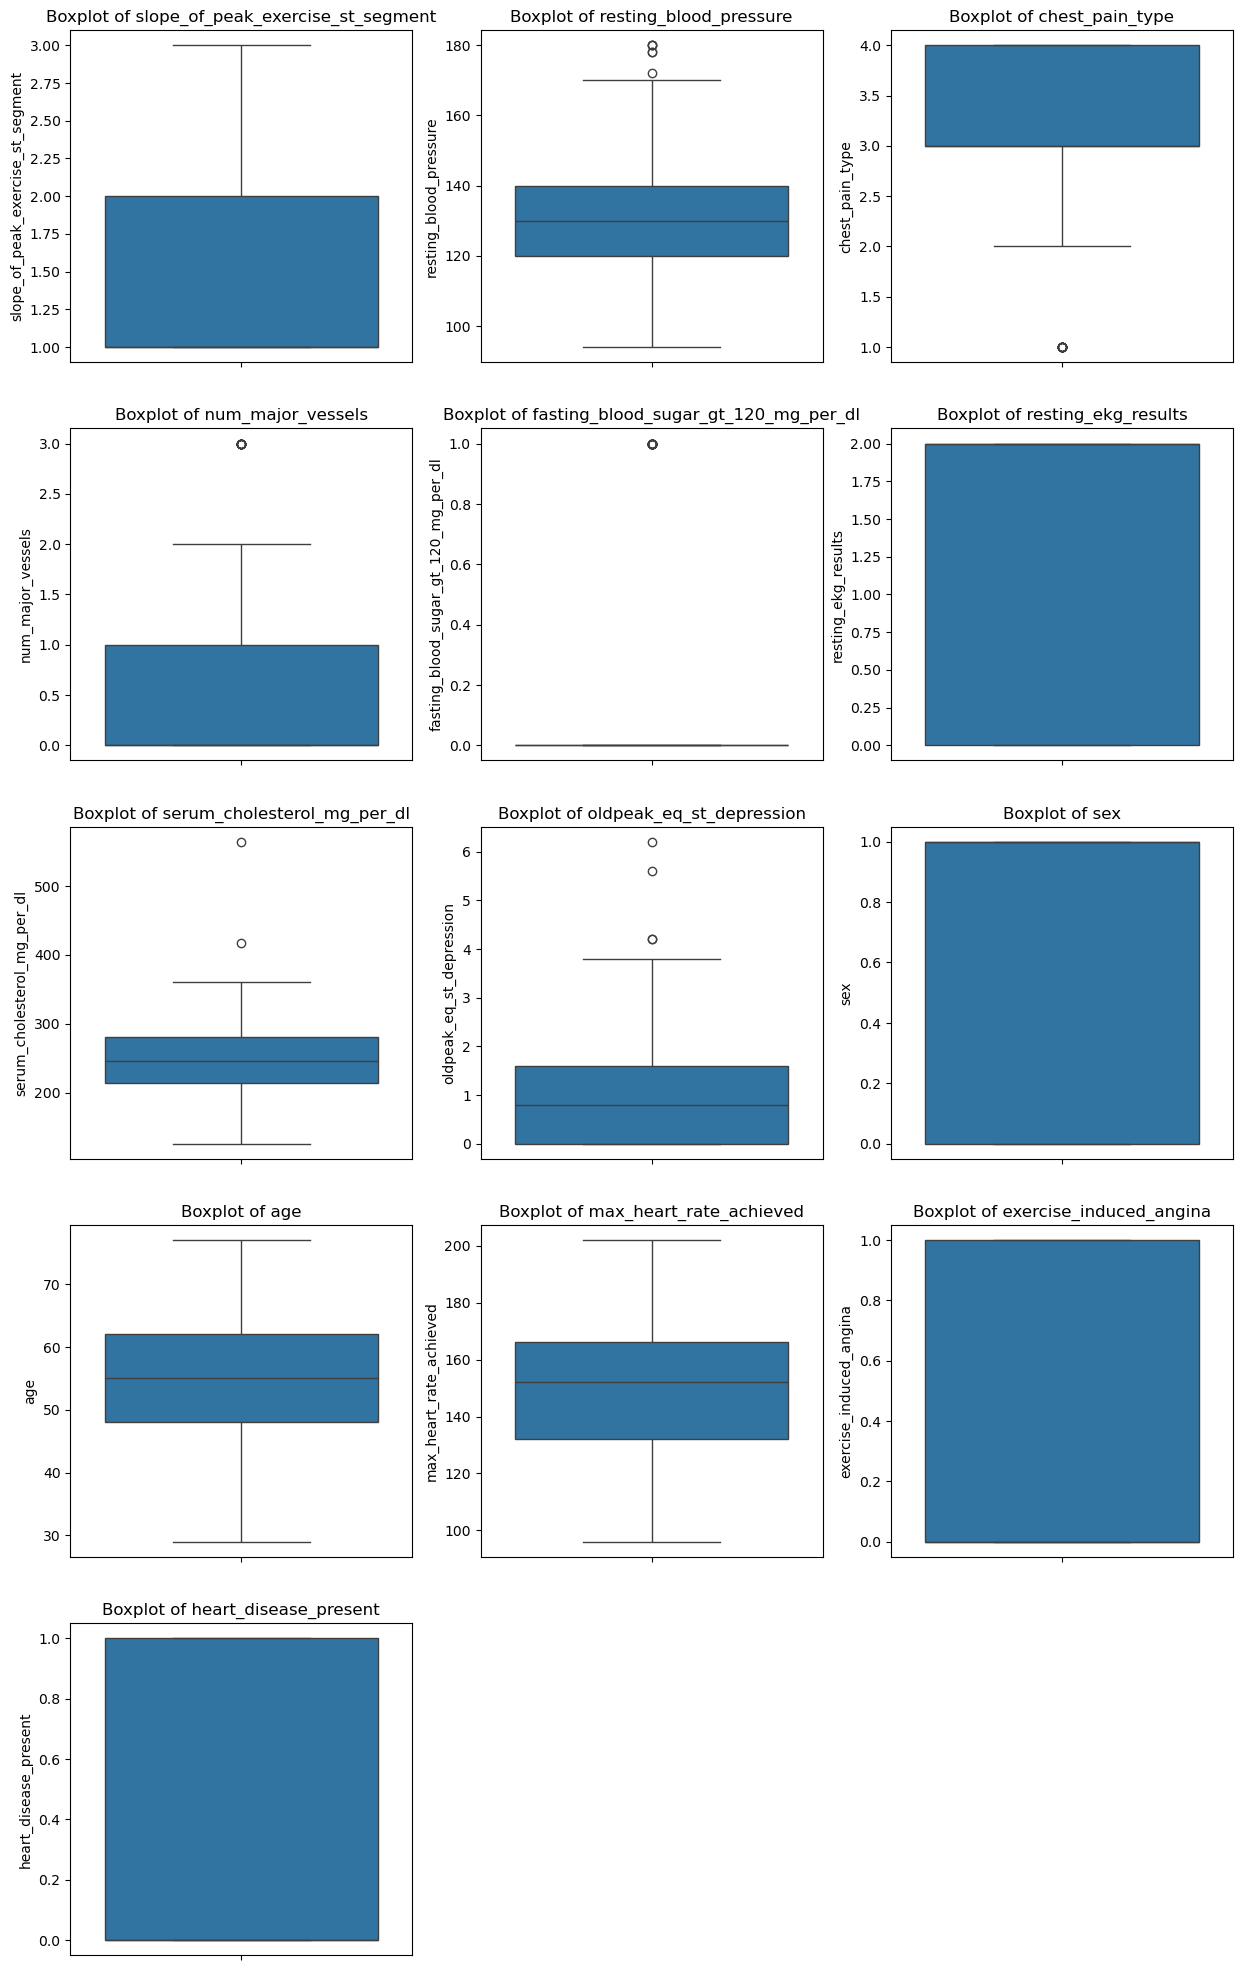

In [100]:
import math
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
cols = 3  # Number of plots per row
rows = math.ceil(len(numerical_columns) / cols)  # Number of rows needed

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 5 * rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

# Dealing with outliers

In [103]:
relevant_features=['resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl',
                   'serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression']

In [104]:
# Remove outliers using Z-score
for feature in relevant_features:
    z_scores =np.abs(stats.zscore(df[feature]))
    outlier_threshold = 2.5
    data=df[z_scores < outlier_threshold]

In [105]:
# print removed outliers
print("Removed outliers:", len(pd.read_csv('merged_data.csv'))-len(data))

Removed outliers: 4


In [106]:
df=df.dropna()

In [107]:
X=df.drop('heart_disease_present',axis=1)
Y=df['heart_disease_present']

In [113]:
df.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_encoded
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224,0.154101
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506,-0.006088
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829,0.269583
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519,0.174107
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379,-0.070225
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933,-0.052171
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775,0.046448
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930,0.251972
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421,0.265420
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255,-0.007934


<Axes: >

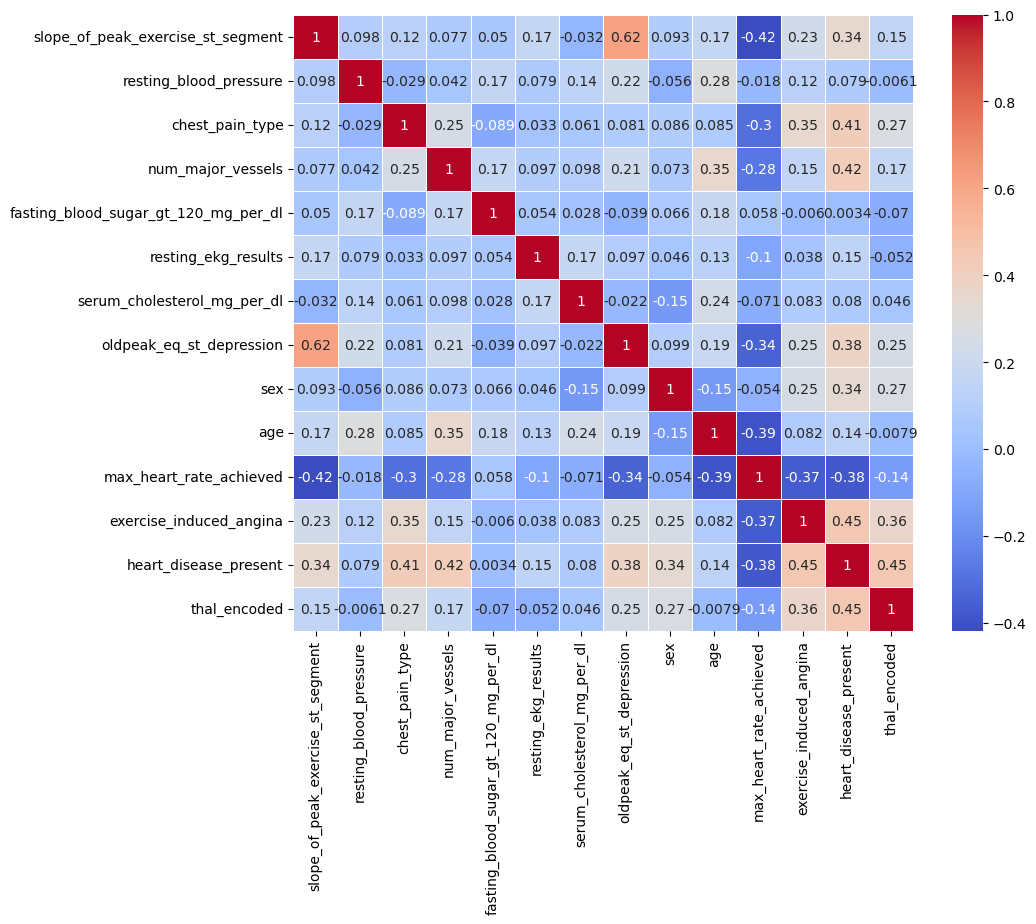

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Strong positive correlation observed between:

Number of major vessels and chest pain type (0.25)

exercise induced angina and heart_disease_present (0.45) strongly associated .

thal_encoded and heart_disease_present (0.45)

# Strong negative correlation:

observed between:Max heart rate and oldpeak_eq_st_depression (-0.39) Higher heart rates are associated with lower heart rates.


In [116]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'thal_encoded'],
      dtype='object')

# Scaling (Train-Test-Split)

In [118]:
# splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [119]:
#train-test-split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Building  the model

In [121]:
model =RandomForestClassifier(random_state=42)

In [122]:
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

# Evaluating the model

In [124]:
Y_pred =model.predict (X_test)

In [125]:
# accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8333333333333334

In [126]:
# precision score
precision_score(Y_test,Y_pred)

1.0

In [127]:
# recall_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
recall_score(Y_test,Y_pred)

0.7

In [128]:
# f1_score
f1_score(Y_test,Y_pred)

0.8235294117647058

# confusion matrix

In [130]:
confusion_matrix(Y_test,Y_pred)

array([[16,  0],
       [ 6, 14]], dtype=int64)

# MODEL CREATION (Logistic Regression)

In [132]:
# defining features and target
X = df.drop("heart_disease_present",axis=1)
Y=df["heart_disease_present"]

In [133]:
non_numeric_columns =df.select_dtypes(include=['object']).columns

In [134]:
## step 2 :splitting train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state =45)

In [135]:
 from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train) ## Creating modle with train data

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
Y_predict =LR.predict(X_test)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1], dtype=int64)

In [137]:
Y_test

174    0
101    0
45     1
28     1
150    0
10     0
0      0
3      1
64     0
135    0
161    1
160    0
115    0
84     0
40     0
122    0
29     0
155    1
144    1
35     0
113    1
116    0
69     1
170    1
80     0
169    0
153    1
159    1
58     0
165    0
138    0
90     0
152    1
72     0
38     0
89     0
168    0
146    0
34     1
66     1
4      0
114    0
167    1
85     1
107    1
Name: heart_disease_present, dtype: int64

# Evaluating the Model

In [140]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [141]:
acc = accuracy_score(Y_test,Y_predict)
acc

0.8222222222222222

In [142]:
precision_score(Y_test,Y_predict)

0.8

In [143]:
recall_score(Y_test,Y_predict)

0.7058823529411765

In [144]:
f1_score(Y_test,Y_predict)

0.7500000000000001

In [145]:
confusion_matrix(Y_test,Y_predict)

array([[25,  3],
       [ 5, 12]], dtype=int64)

# SVM Model

In [147]:
# Splitting  the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [149]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [151]:
# Training  the SVM model with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [152]:
# Predicting  on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model

In [155]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8611111111111112

In [159]:
precision_score(Y_test,Y_predict)

0.8

In [160]:
recall_score(Y_test,Y_predict)

0.7058823529411765

In [161]:
f1_score(Y_test,Y_predict)

0.7500000000000001

In [162]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[16,  0],
       [ 5, 15]], dtype=int64)

# classification report

In [164]:
class_report = classification_report(y_test, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.86        16\n           1       1.00      0.75      0.86        20\n\n    accuracy                           0.86        36\n   macro avg       0.88      0.88      0.86        36\nweighted avg       0.89      0.86      0.86        36\n'

# Saving  the trained model
import joblib
joblib.dump(model, 'heart_disease_model.pkl')

In [166]:
# Importing the joblib library
import joblib

In [167]:
# Loading the saved model
loaded_model = joblib.load('heart_disease_model.pkl')


In [168]:
# Making prediction for the new patient
single_prediction = loaded_model.predict
single_probability = loaded_model.predict_proba

In [169]:
print("Single Patient Prediction: {'Heart Disease' if single_prediction[0] == 1 else 'No Heart Disease'}")
print("Single Patient Probability: {single_probability[0]}")


Single Patient Prediction: {'Heart Disease' if single_prediction[0] == 1 else 'No Heart Disease'}
Single Patient Probability: {single_probability[0]}


In [170]:
# Step 3: Batch prediction
batch_data = [
    [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],  # Patient 1
    [40, 0, 2, 120, 170, 0, 1, 160, 0, 1.4, 2, 0, 2],  # Patient 2
    [45, 1, 1, 130, 204, 0, 0, 140, 1, 2.0, 1, 0, 3]   # Patient 3
]


In [171]:
# Make predictions for the batch
batch_predictions = loaded_model.predict(batch_data)
batch_probabilities = loaded_model.predict_proba(batch_data)


C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [172]:
print("\nBatch Predictions:")
for i, patient in enumerate(batch_data):
    print(f"Patient {i + 1}:")
    print(f"  Prediction: {'Heart Disease' if batch_predictions[i] == 1 else 'No Heart Disease'}")
    print(f"  Probability: {batch_probabilities[i]}")



Batch Predictions:
Patient 1:
  Prediction: Heart Disease
  Probability: [0.43 0.57]
Patient 2:
  Prediction: Heart Disease
  Probability: [0.4 0.6]
Patient 3:
  Prediction: Heart Disease
  Probability: [0.4 0.6]


In [173]:
# Step 4: Save predictions to a CSV file
import pandas as pd

In [174]:
# Create a DataFrame for batch results
results = pd.DataFrame(batch_data, columns=[
    'Age', 'Sex', 'CP', 'RestBP', 'Chol', 'FBS', 'RestECG', 
    'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'CA', 'Thal'])
results['Prediction'] = ['Heart Disease' if pred == 1 else 'No Heart Disease' for pred in batch_predictions]
results['Probability'] = [prob[1] for prob in batch_probabilities]

In [175]:
# Save results to CSV
results.to_csv('heart_disease_predictions.csv', index=False)
print("\nBatch predictions saved to 'heart_disease_predictions.csv'.")


Batch predictions saved to 'heart_disease_predictions.csv'.


# Model comparison report

In [177]:
results_dict = {
    "Model": [ "Random Forest","Logistic Regression", "SVM"],
    "Accuracy": [83.0, 82.0, 86.0 ],
    "Precision": [1.0,0.8,0.8],
    "Recall": [0.7,0.7,0.7],
    "F1-Score": [82,72,72],
}


In [178]:
results_df = pd.DataFrame(results_dict)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest      83.0        1.0     0.7        82
1  Logistic Regression      82.0        0.8     0.7        72
2                  SVM      86.0        0.8     0.7        72


Three machine learning models were evaluated:
The SVM model achieved the highest accuracy of 86%.
Random forest and Logistic Regression models performed similarly, with accuracies of 83% and 82%, 
respectively.

In [180]:
# Save to CSV
results_df.to_csv("model_comparison_report.csv", index=False)

# Save to Excel
results_df.to_excel("model_comparison_report.xlsx", index=False)


Text(0, 0.5, 'Accuracy')

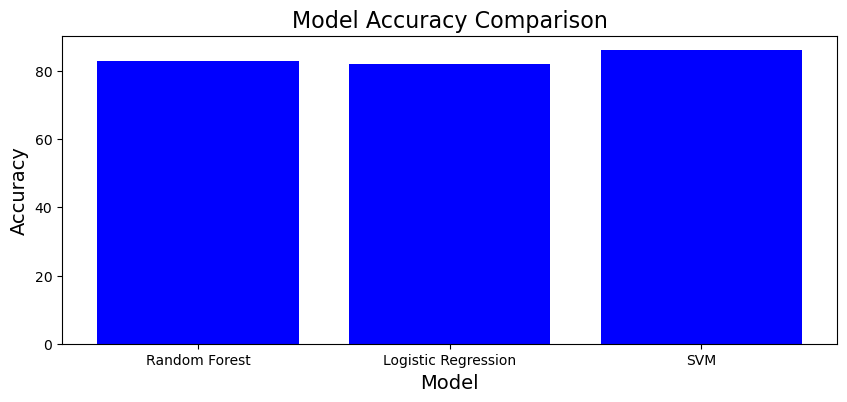

In [181]:
# Plot Accuracy Comparison
plt.figure(figsize=(10, 4))
plt.bar(results_df["Model"], results_df["Accuracy"], color= 'blue')
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)


# TASK -3 Suggestions to the Hospital to awake the predictions of heart diseases prevent life threats.

##### To prevent  the risk of heart disease and improve patient outcomes, the hospital should consider the following suggestions
####   Regular health screening
Getting  regular health screening tests such as (BP & cholestrol) for patients in between age (45-60) especially people having high cholestrol .
####   Integration of predictive models
Use of Machine learning predictive tools like  logistic regression to identify high-risk patients during routine check-ups.
Training  medical staff to interpret model outputs and implement early intervention strategies.
#### Healthy Lifestyle awarness 
Maintaining healthy diet
Regular physical activity
Stress management
#### Personalizing data related patients
maintaining patient's past checkup's data  and analysing data 



 Hospitals can play a pivotal role in implementing these strategies to prevent life-threatening conditions

# Key findings and insights

Patients with high cholesterol and low maximum heart rate are at greater risk of heart disease.

Exercise-induced angina and ST depression (Oldpeak) are significant predictors.

Chest pain type provides valuable diagnostic information.